# url: https://bunsekikobako.com/python_pareto_chart/

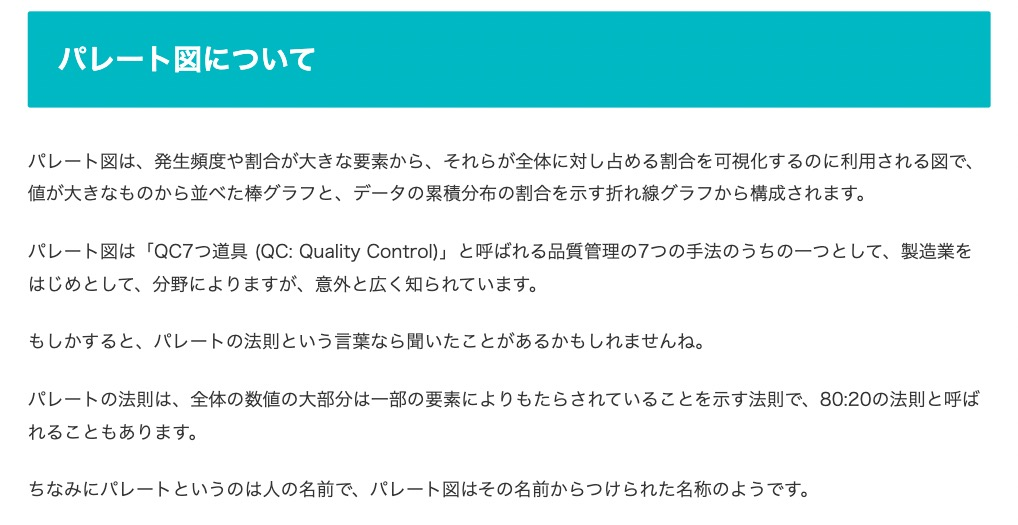

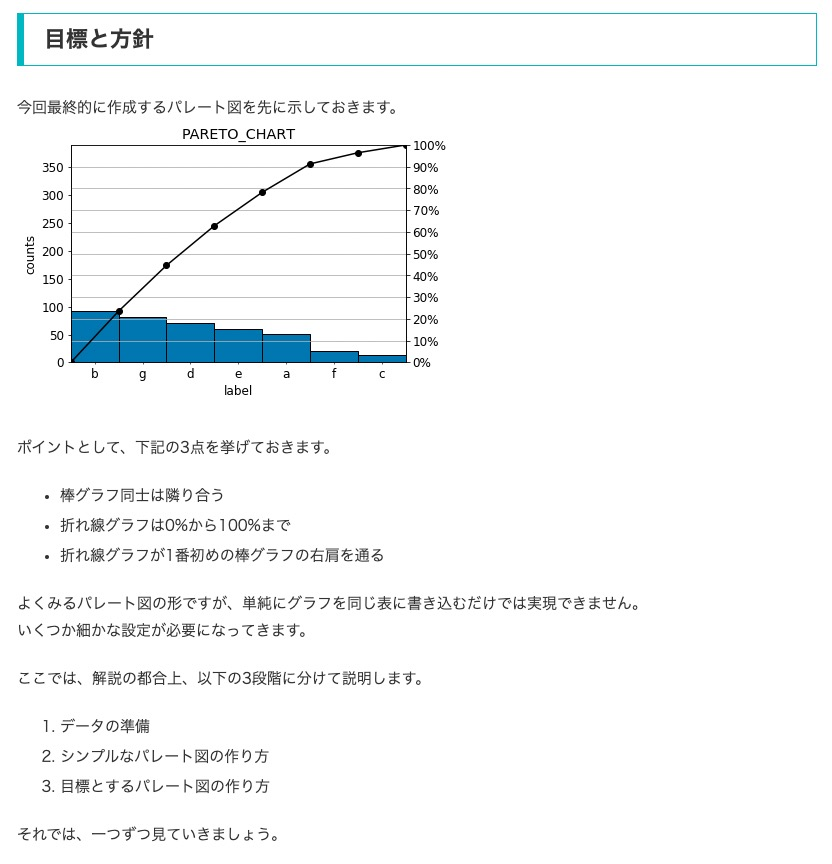

# データの準備
## サンプルデータの作成
作図に使用するデータを準備します。ラベルと値は適当に準備しました。



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size'] = 12

sample_label = ["a", "b", "c", "d", "e", "f", "g"]
np.random.seed(seed=42)
sample_data = np.random.randint(0, 100, size=7)

display(sample_label)
display(sample_data)

# 一応ポイントとしては、
#     ・ 後のためにフォントのサイズを変えておく
#     ・ np.random.randint()の値を再現するために、np.random.seed()を入れておく。
# といったことをしています。

# ラベル名は適当につけましたが、実用例としては、品質不具合の要素や、アンケートで集まった不満点などになるでしょうか。

['a', 'b', 'c', 'd', 'e', 'f', 'g']

array([51, 92, 14, 71, 60, 20, 82])

## データフレームの作成

In [2]:
sample_df = pd.DataFrame({"label": sample_label, "data":sample_data})
sample_df = sample_df.sort_values(by="data", ascending=False)

display(sample_df)

,label,data
1,b,92
6,g,82
3,d,71
4,e,60
0,a,51
5,f,20
2,c,14


## 累積和をとる

In [3]:
sample_df["accum"] = np.cumsum(sample_df["data"])
display(sample_df)

,label,data,accum
1,b,92,92
6,g,82,174
3,d,71,245
4,e,60,305
0,a,51,356
5,f,20,376
2,c,14,390


## 累積和の割合の計算

In [4]:
# パーセント表示の割合を作成する
sample_df["accum_percent"] = sample_df["accum"] / sample_df["data"].sum() * 100
display(sample_df)

,label,data,accum,accum_percent
1,b,92,92,23.589744
6,g,82,174,44.615385
3,d,71,245,62.820513
4,e,60,305,78.205128
0,a,51,356,91.282051
5,f,20,376,96.410256
2,c,14,390,100.000000


## シンプルなパレート図の作り方

Text(0.5, 1.0, 'PARETO_CHART')

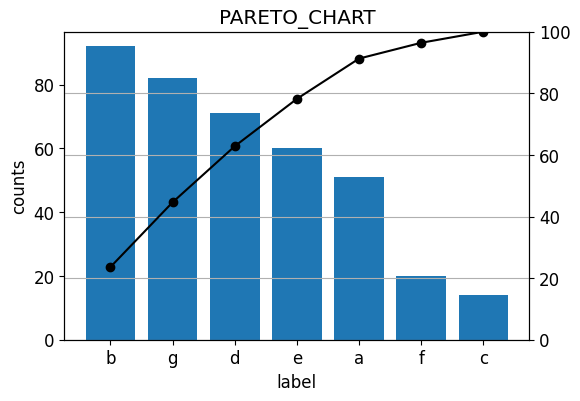

In [5]:
# それでは、単純なパレート図を作成してみましょう。
# ここでのポイントは一つだけです。
#     ・ 1つの図に縦軸が異なる2つのグラフを書くために、axes.twinx()を使う。
# axes.twinx()は、x軸を共有させて作図をするために使用します。
# シンプルなパレート図を作るだけならこれだけで問題ありません。

# なお、今回に限らず、matplollibでの描画では、pltではなくaxesを使った方が描画の対象を意識しやすく、応用も楽だと思います。

# それではコードを見てみましょう。
fig, ax1 = plt.subplots(figsize=(6,4))                                   # 新しいFigureとAxesを作成します。figsizeは図のサイズを指定します。ax1は主のy軸です。
data_num = len(sample_df)                                                # データフレームsample_df の行数を取得します。

ax1.bar(range(data_num), sample_df["data"])                              # ax1上にバー（棒）プロットを作成します。各バーはsample_df["data"]に対応し、横軸はrange(data_num)です。
ax1.set_xticks(range(data_num))                                          # x軸のメモリをデータポイントの位置に設定します。
ax1.set_xticklabels(sample_df["label"].tolist())                         # x軸のメモリのラベルをsample_df["label"]の値に設定します。
ax1.set_xlabel("label")                                                  # x軸のラベルを設定します。
ax1.set_ylabel("counts")                                                 # 主のy軸（左側）のラベルを設定します。

ax2 = ax1.twinx()                                                        # ax1と同じx軸を共有する新しいy軸 ax2 を作成します。
ax2.plot(range(data_num), sample_df["accum_percent"], c="k", marker="o") # ax2上に折れ線グラフを作成します。各点はsample_df["accum_percent"]に対応し、横軸はrange(data_num)です。c="k"は黒色、marker="o"は点を示します。
ax2.set_ylim([0, 100])                                                   # ax2のy軸の範囲を0から100に設定します。

ax2.grid(True, which='both', axis='y')                                   # ax2のy軸にグリッドを表示します。

ax1.set_title("PARETO_CHART")                                            # グラフのタイトルを設定します。

# 画像の保存
# plt.savefig("pareto_chart1.png", bbox_inches="tight")

# 見やすいグラフではありませんが、一応パレート図としての役割は果たすことができています。

Text(0.5, 1.0, 'PARETO_CHART')

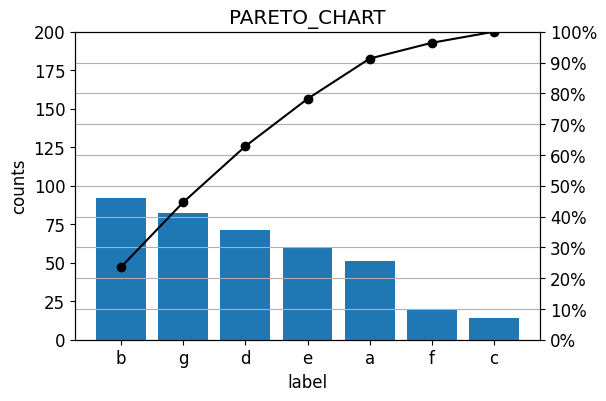

In [6]:
# さすがに見辛いので、以下の3点の対応をしておきましょう。
#     ・棒グラフの縦軸の範囲を広げる。ここでは一旦[0, 200]にする。
#     ・右側の縦軸を20ごとではなく10ごとに変更し、%も表示させる。
#     ・右側の縦軸に10ごとにlabelを表示させる。
# 1点目の対応はaxes.set_ylim([ymin, ymax])でOKですね。

# 2点目と3点目には、axes.set_yticks()とaxes.set_yticklabels()を使います。
# 前者で目盛のための場所を準備し、後者でラベルを表示させるイメージですね。

# では、コードを確認しましょう。

fig, ax1 = plt.subplots(figsize=(6,4))
data_num = len(sample_df)

# ラベルの準備
percent_labels = [str(i) + "%" for i in np.arange(0, 100+1, 10)]

ax1.bar(range(data_num), sample_df["data"])
ax1.set_xticks(range(data_num))
ax1.set_xticklabels(sample_df["label"].tolist())
ax1.set_ylim([0, 200])
ax1.set_xlabel("label")
ax1.set_ylabel("counts")

ax2 = ax1.twinx()
ax2.plot(range(data_num), sample_df["accum_percent"], c="k", marker="o")
ax2.set_ylim([0, 100])
ax2.set_yticks(np.arange(0, 100+1, 10))
ax2.set_yticklabels(percent_labels)

ax2.grid(True, which='both', axis='y')

ax1.set_title("PARETO_CHART")

# plt.savefig("pareto_chart2.png", bbox_inches="tight")

# これで大分見やすいグラフになったかと思います。
# 最低限のグラフとしてはここまでで十分ですね。ここからは表示の仕方を工夫していきます。

# 目標とするパレート図の作り方

今回目標とするパレート図のポイントは下記の3点でした。

    ・棒グラフ同士は隣り合う
    ・折れ線グラフは0%から100%まで
    ・折れ線グラフが1番初めの棒グラフの右肩を通る

この条件を満たすためのポイントが3つあります。まず初めの2つを見ていきましょう。

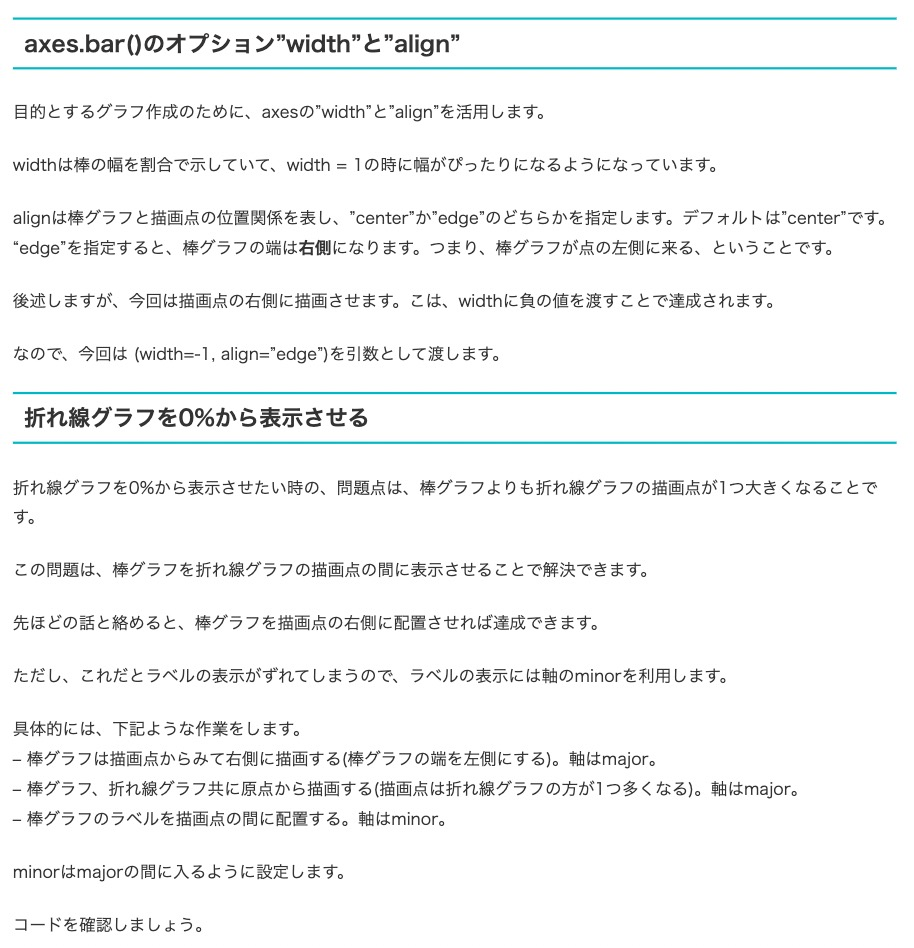

Text(0.5, 1.0, 'PARETO_CHART')

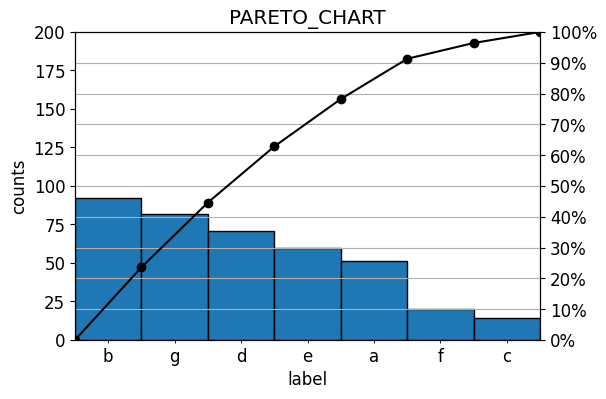

In [7]:
fig, ax1 = plt.subplots(figsize=(6,4))
data_num = len(sample_df)

# 折れ線グラフを0%から表示させるためのデータの準備
accum_to_plot = [0] + sample_df["accum_percent"].tolist()                                   # 折れ線グラフを0%から表示させるためのデータを準備します。累積パーセンテージの前に0を追加しています。

percent_labels = [str(i) + "%" for i in np.arange(0, 100+1, 10)]                            # y軸のラベルとして使うパーセントのラベルを作成します。

ax1.bar(range(1, data_num + 1), sample_df["data"], align="edge", width=-1, edgecolor='k')   # バー（棒）プロットを作成します。align="edge"とwidth=-1は、棒を1つずらして隣り合う棒が隙間なく表示されるようにしています。edgecolor='k'は棒の枠線の色を黒に設定します。

# 棒グラフのラベルは0.5の位置に設定
ax1.set_xticks([0.5 + i for i in range(data_num)], minor=True)                              # x軸のメモリの位置を調整します。minor=Trueは補助メモリに設定します。
ax1.set_xticklabels(sample_df["label"].tolist(), minor=True)                                # x軸のラベルを設定します。

# x軸のmajorは描画のためだけなので隠す
ax1.tick_params(axis="x", which="major", direction="in")                                    # x軸のmajorメモリを隠します。
ax1.set_ylim([0, 200])
ax1.set_xlabel("label")
ax1.set_ylabel("counts")

ax2 = ax1.twinx()
ax2.set_xticks(range(data_num+1))
ax2.plot(range(data_num+1), accum_to_plot, c="k", marker="o")
ax2.set_xticklabels([])
ax2.set_xlim([0,data_num])
ax2.set_ylim([0, 100])
ax2.set_yticks(np.arange(0, 100+1, 10))
ax2.set_yticklabels(percent_labels)

ax2.grid(True, which='both', axis='y')

ax1.set_title("PARETO_CHART")

# plt.savefig("pareto_chart3.png", bbox_inches="tight")

# 本筋のところは先に記述した通りです。
# 細かなポイントとして、グラフに余計なラベルが表示されないようにax1.tick_params()で目盛を隠したり、set_xticks([])で不要なラベルを消すようにしています。

## 折れ線グラフが1番初めの棒グラフの右肩を通るようにする

Text(0.5, 1.0, 'PARETO_CHART')

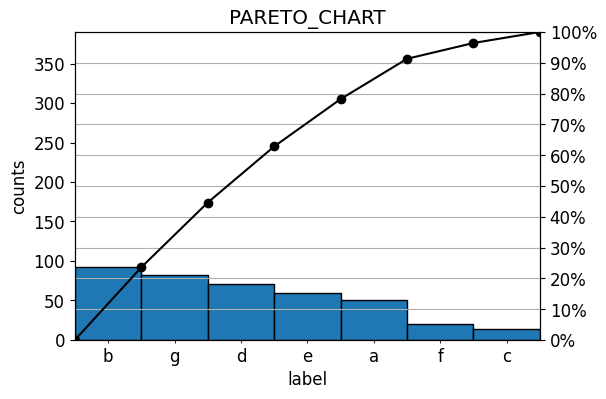

In [8]:
# 最後に、折れ線グラフが1番目の棒グラフの右肩を通過するようにしましょう。
# と言ってもこれは簡単で、棒グラフの縦軸の最大値をデータの総数にするだけです。
# 言い換えると、折れ線と同様に、全体に対する割合を示すように縦軸を調整します。
# コードとしては、棒グラフの表示範囲をax1.set_ylim([0, sum(sample_df[“data”])])とすればOKです。

fig, ax1 = plt.subplots(figsize=(6,4))
data_num = len(sample_df)

accum_to_plot = [0] + sample_df["accum_percent"].tolist()

percent_labels = [str(i) + "%" for i in np.arange(0, 100+1, 10)]

ax1.bar(range(1, data_num + 1), sample_df["data"], align="edge", width=-1, edgecolor='k')

ax1.set_xticks([0.5 + i for i in range(data_num)], minor=True)
ax1.set_xticklabels(sample_df["label"].tolist(), minor=True)
ax1.tick_params(axis="x", which="major", direction="in")

# 変更はここだけ
ax1.set_ylim([0, sum(sample_df["data"])])
ax1.set_xlabel("label")
ax1.set_ylabel("counts")

ax2 = ax1.twinx()
ax2.set_xticks(range(data_num+1))
ax2.plot(range(data_num+1), accum_to_plot, c="k", marker="o")
ax2.set_xticklabels([])
ax2.set_xlim([0,data_num])
ax2.set_ylim([0, 100])
ax2.set_yticks(np.arange(0, 100+1, 10))
ax2.set_yticklabels(percent_labels)

ax2.grid(True, which='both', axis='y')

ax1.set_title("PARETO_CHART")

# plt.savefig("pareto_chart4.png", bbox_inches="tight")